**Histrograms**

In [2]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

d:\Anaconda\App\envs\pythoncourse\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [4]:
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else x)

**Ex_1**

Let's create a histogram to show the distribution of yearly salaries (salary_year_avg) for data analyst positions.

In [ ]:
# Data Analysts jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN Values from the 'salary_year_avg column  for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

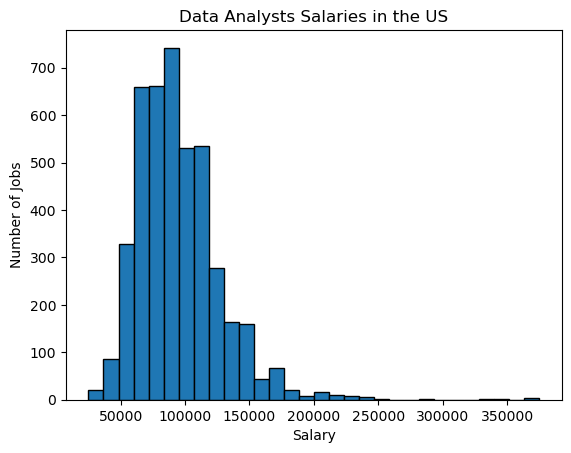

In [9]:
# Plotting

df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

# Alternative with matplotlib
#plt.hist(df_DA_US['salary_year_avg'], bins=30, edgecolor='black')

plt.title('Data Analysts Salaries in the US')
plt.xlabel('Salary')
plt.ylabel('Number of Jobs')
plt.show()

*****How would you interpret this?*****


The histogram shows that most data analyst jobs in the U.S. offer salaries between 75,000 and 150,000, peaking around 100,000 to 125,000. As salaries increase beyond 150,000 the number of positions declines significantly. Ver few data analysts roles pay above 250,000.

**Customization**

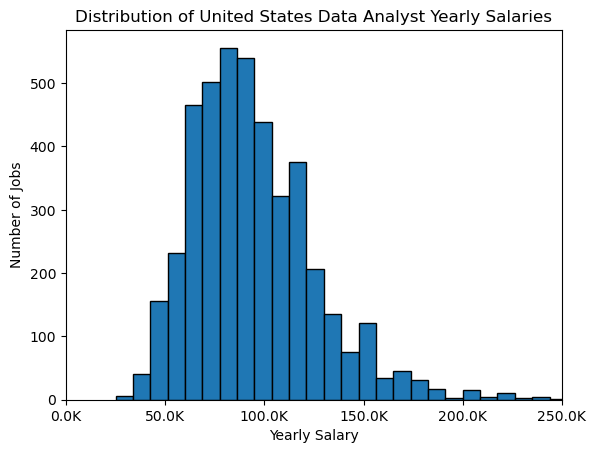

In [12]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y/1000}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()